# Performance of Different Optimizers on MNIST

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 定义图像预处理
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 的均值和标准差
])

# 下载训练和测试集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:22<00:00, 450293.30it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 122787.68it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:11<00:00, 149566.47it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



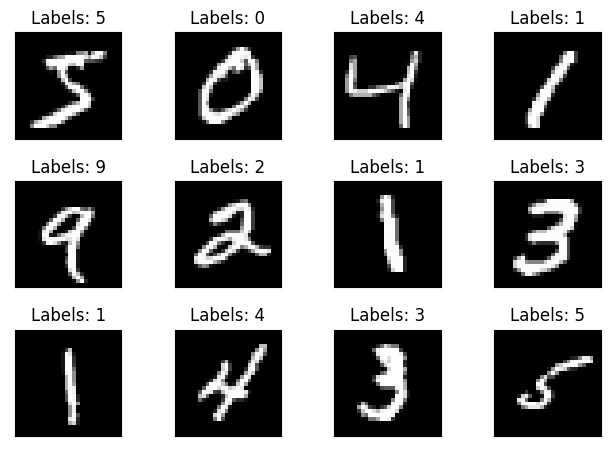

In [8]:
# 查看数据集中的前12张图片
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.tight_layout()
    plt.imshow(train_dataset.data[i], cmap='gray', interpolation='none')
    plt.title("Labels: {}".format(train_dataset.targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [14]:
# 创建一个简单的网络，只包含两层全连接层
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 展平成向量
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [15]:
def train(model, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

def evaluate(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [16]:
# Optimizer为Adam,lr=0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_adam = Net().to(device)
optimizer = optim.Adam(model_adam.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train(model_adam, optimizer, criterion, epochs=20)
evaluate(model_adam)

Epoch [1/20], Loss: 0.2663
Epoch [2/20], Loss: 0.1134
Epoch [3/20], Loss: 0.0797
Epoch [4/20], Loss: 0.0602
Epoch [5/20], Loss: 0.0470
Epoch [6/20], Loss: 0.0390
Epoch [7/20], Loss: 0.0324
Epoch [8/20], Loss: 0.0265
Epoch [9/20], Loss: 0.0247
Epoch [10/20], Loss: 0.0196
Epoch [11/20], Loss: 0.0176
Epoch [12/20], Loss: 0.0154
Epoch [13/20], Loss: 0.0149
Epoch [14/20], Loss: 0.0129
Epoch [15/20], Loss: 0.0129
Epoch [16/20], Loss: 0.0115
Epoch [17/20], Loss: 0.0112
Epoch [18/20], Loss: 0.0088
Epoch [19/20], Loss: 0.0085
Epoch [20/20], Loss: 0.0107
Test Accuracy: 97.70%


In [17]:
# optimizer 为sgd, lr=0.001
model_sgd = Net().to(device)
optimizer = optim.SGD(model_sgd.parameters(), lr=0.001)

train(model_sgd, optimizer, criterion, epochs=20)
evaluate(model_sgd)

Epoch [1/20], Loss: 1.5929
Epoch [2/20], Loss: 0.7950
Epoch [3/20], Loss: 0.5705
Epoch [4/20], Loss: 0.4792
Epoch [5/20], Loss: 0.4292
Epoch [6/20], Loss: 0.3975
Epoch [7/20], Loss: 0.3750
Epoch [8/20], Loss: 0.3579
Epoch [9/20], Loss: 0.3445
Epoch [10/20], Loss: 0.3331
Epoch [11/20], Loss: 0.3234
Epoch [12/20], Loss: 0.3151
Epoch [13/20], Loss: 0.3076
Epoch [14/20], Loss: 0.3010
Epoch [15/20], Loss: 0.2945
Epoch [16/20], Loss: 0.2887
Epoch [17/20], Loss: 0.2835
Epoch [18/20], Loss: 0.2783
Epoch [19/20], Loss: 0.2735
Epoch [20/20], Loss: 0.2690
Test Accuracy: 92.59%


In [18]:
# optimizer为adagrad， lr=0.001
model_adagrad = Net().to(device)
optimizer = optim.Adagrad(model_adagrad.parameters(), lr=0.001)

train(model_adagrad, optimizer, criterion, epochs=20)
evaluate(model_adagrad)

Epoch [1/20], Loss: 0.5126
Epoch [2/20], Loss: 0.3464
Epoch [3/20], Loss: 0.3160
Epoch [4/20], Loss: 0.2988
Epoch [5/20], Loss: 0.2868
Epoch [6/20], Loss: 0.2773
Epoch [7/20], Loss: 0.2696
Epoch [8/20], Loss: 0.2627
Epoch [9/20], Loss: 0.2568
Epoch [10/20], Loss: 0.2516
Epoch [11/20], Loss: 0.2468
Epoch [12/20], Loss: 0.2424
Epoch [13/20], Loss: 0.2386
Epoch [14/20], Loss: 0.2347
Epoch [15/20], Loss: 0.2311
Epoch [16/20], Loss: 0.2277
Epoch [17/20], Loss: 0.2247
Epoch [18/20], Loss: 0.2216
Epoch [19/20], Loss: 0.2190
Epoch [20/20], Loss: 0.2163
Test Accuracy: 93.98%


In [20]:
# 我应该在训练过程中记录loss的但我忘了，使用re直接从输出中读取吧
import re

adam_loss_str = '''
Epoch [1/20], Loss: 0.2663
Epoch [2/20], Loss: 0.1134
Epoch [3/20], Loss: 0.0797
Epoch [4/20], Loss: 0.0602
Epoch [5/20], Loss: 0.0470
Epoch [6/20], Loss: 0.0390
Epoch [7/20], Loss: 0.0324
Epoch [8/20], Loss: 0.0265
Epoch [9/20], Loss: 0.0247
Epoch [10/20], Loss: 0.0196
Epoch [11/20], Loss: 0.0176
Epoch [12/20], Loss: 0.0154
Epoch [13/20], Loss: 0.0149
Epoch [14/20], Loss: 0.0129
Epoch [15/20], Loss: 0.0129
Epoch [16/20], Loss: 0.0115
Epoch [17/20], Loss: 0.0112
Epoch [18/20], Loss: 0.0088
Epoch [19/20], Loss: 0.0085
Epoch [20/20], Loss: 0.0107
''' 
adam_loss = [float(x) for x in re.findall(r"Loss: (\d+\.\d+)", adam_loss_str)]
print(adam_loss)

[0.2663, 0.1134, 0.0797, 0.0602, 0.047, 0.039, 0.0324, 0.0265, 0.0247, 0.0196, 0.0176, 0.0154, 0.0149, 0.0129, 0.0129, 0.0115, 0.0112, 0.0088, 0.0085, 0.0107]


In [21]:
sgd_loss_str = '''
Epoch [1/20], Loss: 1.5929
Epoch [2/20], Loss: 0.7950
Epoch [3/20], Loss: 0.5705
Epoch [4/20], Loss: 0.4792
Epoch [5/20], Loss: 0.4292
Epoch [6/20], Loss: 0.3975
Epoch [7/20], Loss: 0.3750
Epoch [8/20], Loss: 0.3579
Epoch [9/20], Loss: 0.3445
Epoch [10/20], Loss: 0.3331
Epoch [11/20], Loss: 0.3234
Epoch [12/20], Loss: 0.3151
Epoch [13/20], Loss: 0.3076
Epoch [14/20], Loss: 0.3010
Epoch [15/20], Loss: 0.2945
Epoch [16/20], Loss: 0.2887
Epoch [17/20], Loss: 0.2835
Epoch [18/20], Loss: 0.2783
Epoch [19/20], Loss: 0.2735
Epoch [20/20], Loss: 0.2690
'''
sgd_loss = [float(x) for x in re.findall(r"Loss: (\d+\.\d+)", sgd_loss_str)]
print(sgd_loss)

[1.5929, 0.795, 0.5705, 0.4792, 0.4292, 0.3975, 0.375, 0.3579, 0.3445, 0.3331, 0.3234, 0.3151, 0.3076, 0.301, 0.2945, 0.2887, 0.2835, 0.2783, 0.2735, 0.269]


In [23]:
adagrad_loss_str = '''
Epoch [1/20], Loss: 0.5126
Epoch [2/20], Loss: 0.3464
Epoch [3/20], Loss: 0.3160
Epoch [4/20], Loss: 0.2988
Epoch [5/20], Loss: 0.2868
Epoch [6/20], Loss: 0.2773
Epoch [7/20], Loss: 0.2696
Epoch [8/20], Loss: 0.2627
Epoch [9/20], Loss: 0.2568
Epoch [10/20], Loss: 0.2516
Epoch [11/20], Loss: 0.2468
Epoch [12/20], Loss: 0.2424
Epoch [13/20], Loss: 0.2386
Epoch [14/20], Loss: 0.2347
Epoch [15/20], Loss: 0.2311
Epoch [16/20], Loss: 0.2277
Epoch [17/20], Loss: 0.2247
Epoch [18/20], Loss: 0.2216
Epoch [19/20], Loss: 0.2190
Epoch [20/20], Loss: 0.2163
'''
adagrad_loss = [float(x) for x in re.findall(r"Loss: (\d+\.\d+)", adagrad_loss_str)]
print(adagrad_loss)

[0.5126, 0.3464, 0.316, 0.2988, 0.2868, 0.2773, 0.2696, 0.2627, 0.2568, 0.2516, 0.2468, 0.2424, 0.2386, 0.2347, 0.2311, 0.2277, 0.2247, 0.2216, 0.219, 0.2163]


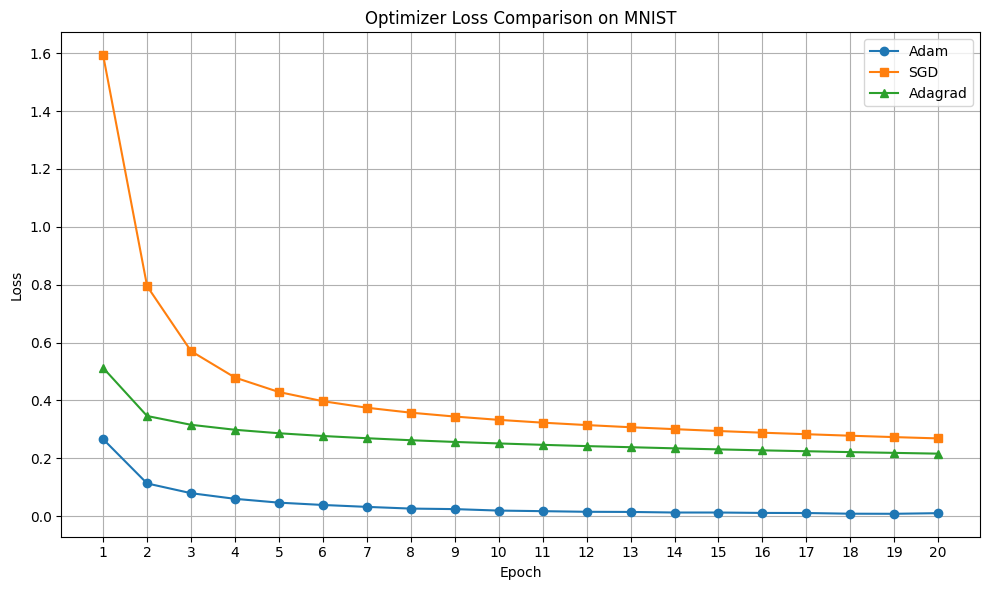

In [28]:
epochs = list(range(1, len(adam_loss) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, adam_loss, label="Adam", marker='o')
plt.plot(epochs, sgd_loss, label="SGD", marker='s')
plt.plot(epochs, adagrad_loss, label="Adagrad", marker='^')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Optimizer Loss Comparison on MNIST")
plt.legend()
plt.grid(True)

plt.xticks(epochs)

plt.tight_layout()
plt.savefig("optimizer_loss_comparison.png", dpi=300)
plt.show()